# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [3]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

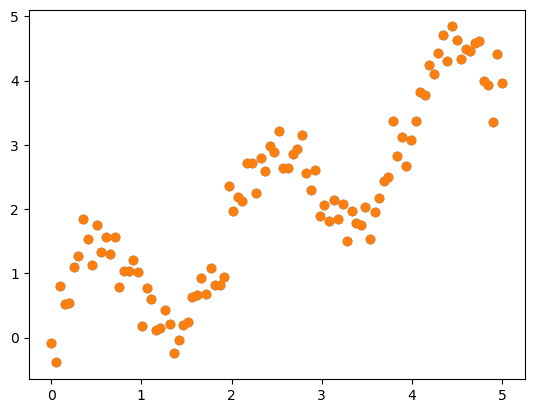

In [7]:
plt.scatter(x,y)
plt.show()

#### nonlinear

In [9]:
regr_lin = LinearRegression()

In [11]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [13]:
regr_lin.fit(X,y)

LinearRegression()

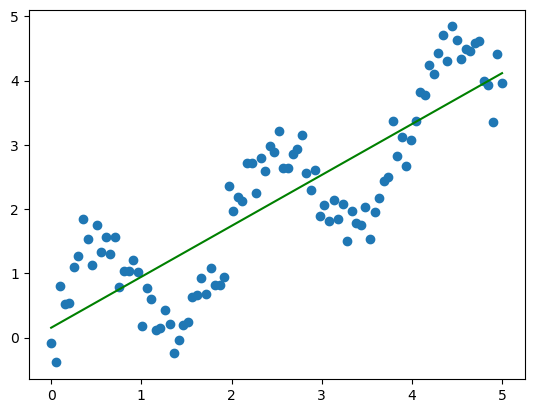

0.5386460988104711


In [19]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='g')
plt.show()
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [21]:
print(x.shape)

(100,)


In [23]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [25]:
regr_poly = LinearRegression()

In [27]:
regr_poly.fit(X_poly, y)

LinearRegression()

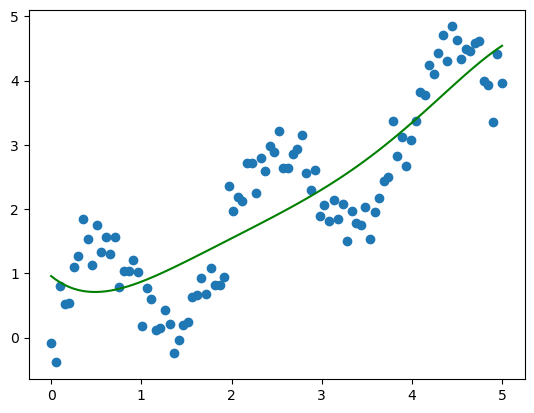

In [31]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'g')
plt.show()

In [35]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.14925682  1.61398534 -0.67773664  0.13552418 -0.00992168]
interception:  0.9584000597065665


In [37]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.95840006, 0.90438724, 0.85809659, 0.8190355 , 0.78673173,
       0.76073306, 0.74060684, 0.72593964, 0.71633683, 0.71142223,
       0.71083767, 0.71424262, 0.72131383, 0.73174487, 0.7452458 ,
       0.76154276, 0.78037755, 0.80150729, 0.824704  , 0.8497542 ,
       0.87645854, 0.90463138, 0.93410044, 0.96470639, 0.99630243,
       1.02875394, 1.06193808, 1.09574337, 1.13006933, 1.1648261 ,
       1.199934  , 1.23532318, 1.2709332 , 1.30671268, 1.34261885,
       1.37861724, 1.41468118, 1.45079152, 1.48693617, 1.5231097 ,
       1.55931303, 1.59555294, 1.63184174, 1.66819685, 1.70464045,
       1.74119902, 1.77790302, 1.81478644, 1.85188647, 1.88924303,
       1.92689847, 1.96489709, 2.00328483, 2.0421088 , 2.08141695,
       2.12125766, 2.16167934, 2.20273004, 2.24445708, 2.28690661,
       2.33012328, 2.3741498 , 2.4190266 , 2.46479137, 2.51147871,
       2.55911977, 2.60774178, 2.65736773, 2.70801594, 2.75969968,
       2.81242677, 2.86619922, 2.9210128 , 2.97685666, 3.03371

In [39]:
regr_poly.predict(X_poly)

array([0.95840006, 0.90438724, 0.85809659, 0.8190355 , 0.78673173,
       0.76073306, 0.74060684, 0.72593964, 0.71633683, 0.71142223,
       0.71083767, 0.71424262, 0.72131383, 0.73174487, 0.7452458 ,
       0.76154276, 0.78037755, 0.80150729, 0.824704  , 0.8497542 ,
       0.87645854, 0.90463138, 0.93410044, 0.96470639, 0.99630243,
       1.02875394, 1.06193808, 1.09574337, 1.13006933, 1.1648261 ,
       1.199934  , 1.23532318, 1.2709332 , 1.30671268, 1.34261885,
       1.37861724, 1.41468118, 1.45079152, 1.48693617, 1.5231097 ,
       1.55931303, 1.59555294, 1.63184174, 1.66819685, 1.70464045,
       1.74119902, 1.77790302, 1.81478644, 1.85188647, 1.88924303,
       1.92689847, 1.96489709, 2.00328483, 2.0421088 , 2.08141695,
       2.12125766, 2.16167934, 2.20273004, 2.24445708, 2.28690661,
       2.33012328, 2.3741498 , 2.4190266 , 2.46479137, 2.51147871,
       2.55911977, 2.60774178, 2.65736773, 2.70801594, 2.75969968,
       2.81242677, 2.86619922, 2.9210128 , 2.97685666, 3.03371

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [41]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [43]:
sigma = 0.3

In [45]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [49]:
regr_rbf = LinearRegression()

In [51]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

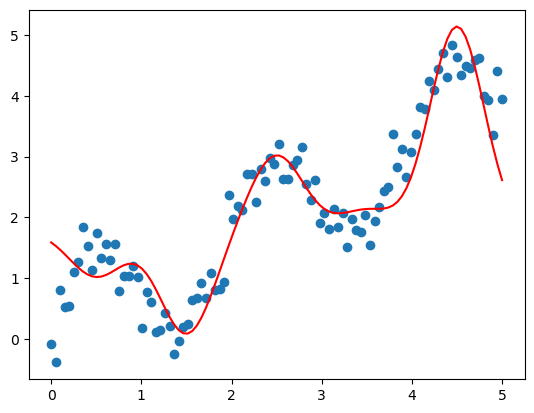

In [53]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')
plt.show()

In [55]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.74950155 -1.69171996  1.25134984  0.34601197  3.3648568 ]
interception:  1.7752883384719989


#### Comparison

In [57]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

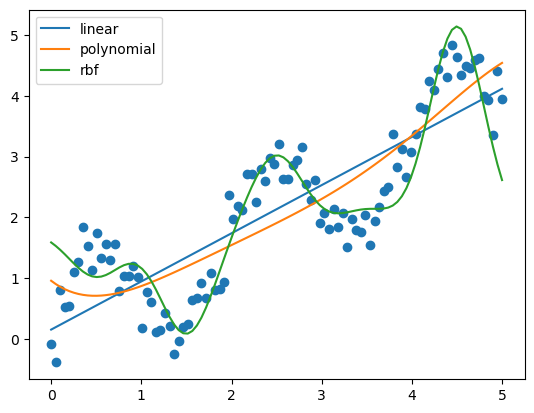

In [63]:
plt.scatter(x,y)
plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()
plt.show()

## 請計算模型的MSE

In [65]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5386460988104711


In [67]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4778016732585868


In [69]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.27075581920414077


In [ ]:
#卡關時可以用不同方法試試降低MSE